### Import necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

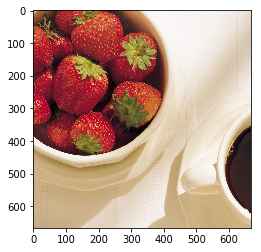

In [2]:
img = "image.jpg"  # Change the filename and path according to your need
rgbimg = cv2.cvtColor(cv2.imread(img,cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

### Part 1: RGB2HSI Conversion and vice versa

In [3]:
def rgb2hsi(rgbimg):
    # Convert rgb images to hsi images
    # Hint: Normalize Hue value to [0,255] for demonstration purpose.
    rows, cols = rgbimg[:,:,0].shape  # We expect that for each channel image dims are same
    s = np.zeros((rows, cols), dtype=np.float32)  # Initialize s
    i = np.zeros((rows, cols), dtype=np.float32)  # Initialize i
    red = rgbimg[:,:,0]/255  # Normalize to 0-1
    green = rgbimg[:,:,1]/255
    blue = rgbimg[:,:,2]/255
    h = []
    for r in range(rows):
        for c in range(cols):
            RG = red[r,c]-green[r,c]+0.001  # Red-Green, add a constant to prevent undefined value
            RB = red[r,c]-blue[r,c]+0.001  # Red-Blue
            GB = green[r,c]-blue[r,c]+0.001  # Green-Blue
            theta = np.arccos(np.clip(((0.5*(RG+RB))/(RG**2+RB*GB)**0.5), -1, 1))  # Still in radians
            theta = np.degrees(theta)  # Convert to degrees
            if blue[r,c] <= green[r,c]:
                h.append(theta)
            else:
                h.append(360 - theta)
    # Hue range will be automatically scaled to 0-255 by matplotlib for display
    # We will need to convert manually to range of 0-360 in hsi2rgb function
    h = np.array(h, dtype=np.int64).reshape(rows, cols)  # Convert Hue to NumPy array
    h = ((h - h.min()) * (1/(h.max() - h.min()) * 360))  # Scale h to 0-360
    minRGB = np.minimum(np.minimum(red, green), blue)
    s = 1-((3/(red+green+blue+0.001))*minRGB)  # Add 0.001 to prevent divide by zero
    i = (red+green+blue)/3  # Intensity: 0-1
    return h, s, i

def hsi2rgb(hsiimg):
    # Convert hsi images to rgb images
    rows, cols = hsiimg[:,:,0].shape  # We expect that for each channel image dims are same
    h = hsiimg[:,:,0]  # 0-360
    h = ((h - h.min()) * (1/(h.max() - h.min()) * 360))  # Scale h to 0-360
    s = hsiimg[:,:,1]  # 0-1
    i = hsiimg[:,:,2]  # 0-1
    rd, gr, bl = [], [], []  # Initialize r, g, and b as empty array
    for r in range(rows):
        for c in range(cols):
            if (h[r,c] >= 0 and h[r,c] <= 120):
                red = (1+((s[r, c]*np.cos(np.radians(h[r, c])))/np.cos(np.radians(60-h[r, c]))))/3
                blue = (1-s[r, c])/3
                rd.append(red)
                gr.append(1-(red+blue))
                bl.append(blue)
            elif (h[r,c] > 120 and h[r,c] <= 240):
                h[r, c] = h[r, c]-120
                red = (1-s[r, c])/3
                green = (1+((s[r, c]*np.cos(np.radians(h[r, c])))/np.cos(np.radians(60-h[r, c]))))/3
                rd.append(red)
                gr.append(green)
                bl.append(1-(red+green))
            elif (h[r,c] > 240 and h[r,c] <= 360):
                h[r, c] = h[r, c]-240
                green = (1-s[r, c])/3
                blue = (1+((s[r, c]*np.cos(np.radians(h[r, c])))/np.cos(np.radians(60-h[r, c]))))/3
                rd.append(1-(green+blue))
                gr.append(green)
                bl.append(blue)
    rd = np.multiply(rd, 3*i.flatten()).reshape(rows, cols)  # R = r*3*i, where r = rd in previous row
    gr = np.multiply(gr, 3*i.flatten()).reshape(rows, cols)
    bl = np.multiply(bl, 3*i.flatten()).reshape(rows, cols)
    return rd, gr, bl

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0.98, 'RGB to HSI and HSI to RGB Image Conversion')

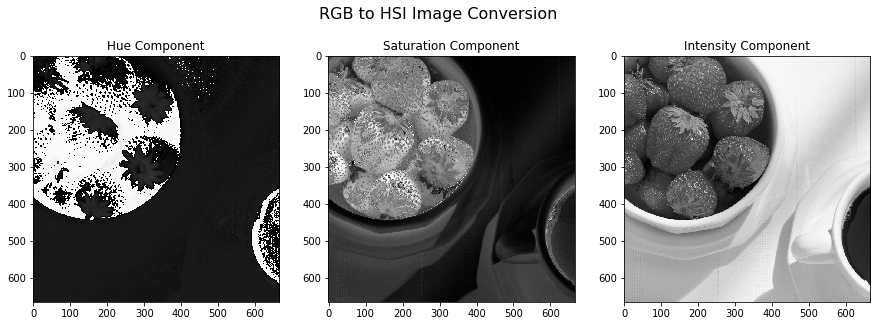

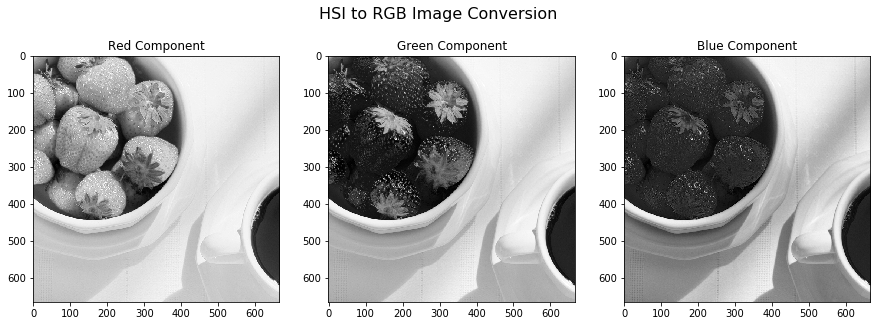

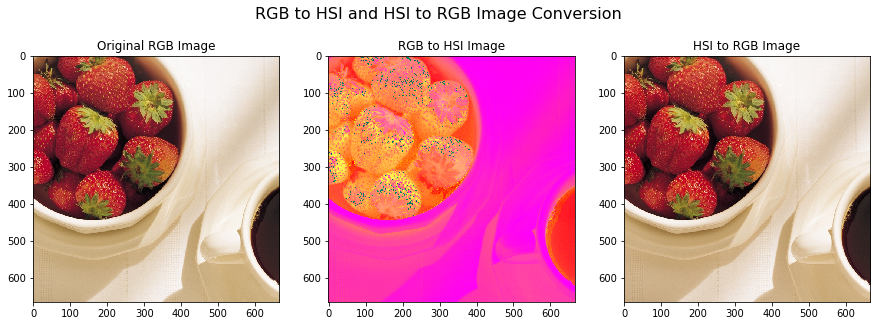

In [4]:
h, s, i = rgb2hsi(rgbimg)
# Construct hsi images
HSIimg = np.zeros((rgbimg.shape[0], rgbimg.shape[1], 3))
HSIimg[:,:,0] = h
HSIimg[:,:,1] = s
HSIimg[:,:,2] = i

r, g, b = hsi2rgb(HSIimg)
# Construct rgb images
RGBimg = np.zeros((rgbimg.shape[0], rgbimg.shape[1], 3))
RGBimg[:,:,0] = r
RGBimg[:,:,1] = g
RGBimg[:,:,2] = b

# Show the result
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(h,cmap='gray')
plt.title("Hue Component")
plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.title("Saturation Component")
plt.subplot(1,3,3)
plt.imshow(i,cmap='gray')
plt.title("Intensity Component")
plt.suptitle("RGB to HSI Image Conversion", fontsize=16)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.title("Red Component")
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.title("Green Component")
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')
plt.title("Blue Component")
plt.suptitle("HSI to RGB Image Conversion", fontsize=16)

# Display original RGB image, RGB2HSI, and HSI2RGB images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(rgbimg)
plt.title("Original RGB Image")
plt.subplot(1,3,2)
plt.imshow(HSIimg)
plt.title("RGB to HSI Image")
plt.subplot(1,3,3)
plt.imshow(RGBimg)
plt.title("HSI to RGB Image")
plt.suptitle("RGB to HSI and HSI to RGB Image Conversion", fontsize=16)

### Part 2: Color Histogram Equalization

In [5]:
def histogram_equalization(img, mode="rgb"):
    # Choose the color model that is most suitable for histogram equalization.
    if mode=="rgb":
        # We will equalize per color channel in RGB equalization
        ch = []
        for it in range(3):
            val, count = np.unique(img[:,:,it], return_counts=True)
            pdf = np.divide(count, sum(count))  # Probability Density Function pr(rk)
            cdf = (val.max()*np.cumsum(pdf)).astype(np.int32)  # Cummulative Density Function
            mp = np.arange(0, val.max()+1)
            mp[val] = cdf  # Map old pixel values to new pixel values
            ch.append(mp[img[:,:,it]])  # Update the pixel values
        heimage = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.int32)  # img must be a NumPy array
        heimage[:,:,0] = ch[0]  # Red channel
        heimage[:,:,1] = ch[1]  # Green channel
        heimage[:,:,2] = ch[2]  # Blue channel
        return heimage
    elif mode=="hsi":
        val, count = np.unique(img[:,:,-1], return_counts=True)  # Equalize on Intensity channel
        val = (val*255).astype(np.uint8)  # Convert val to 255
        pdf = np.divide(count, sum(count))  # Probability Density Function pr(rk)
        cdf = (val.max()*np.cumsum(pdf)).astype(np.int32)  # Cummulative Density Function
        mp = np.arange(0, val.max()+1)
        mp[val] = cdf  # Map old pixel values to new pixel values
        mul = np.multiply(img[:,:,-1], 255).astype(np.uint8)  # Temporarily convert to 255
        img[:,:,-1] = mp[mul]  # Update the pixel values
        img[:,:,-1] = img[:,:,-1]/255  # Convert back to 0-1
        r, g, b = hsi2rgb(img)  # Convert HSI color space to RGB color space
        heimage = np.zeros((img.shape[0], img.shape[1], 3))  # img must be a NumPy array
        heimage[:,:,0] = r  # Red channel
        heimage[:,:,1] = g  # Green channel
        heimage[:,:,2] = b  # Blue channel
        return heimage
    else:
        raise Exception("Please use either RGB/HSI mode")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'HSI Image Histogram Eq (converted to RGB)')

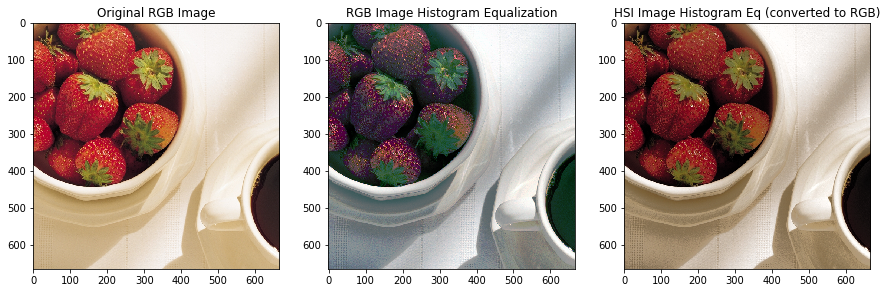

In [6]:
heimgrgb = histogram_equalization(rgbimg, "rgb")  # Choose the color model you want to use as input here (rgbimg or hsiimg)
heimghsi = histogram_equalization(HSIimg, "hsi")

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(rgbimg)
plt.title("Original RGB Image")
plt.subplot(1,3,2)
plt.imshow(heimgrgb)
plt.title("RGB Image Histogram Equalization")
plt.subplot(1,3,3)
plt.imshow(heimghsi)
plt.title("HSI Image Histogram Eq (converted to RGB)")

### Part 3: Noisy RGB and HSI images

Text(0.5, 0.98, 'Noise in HSI Image (per Channel)')

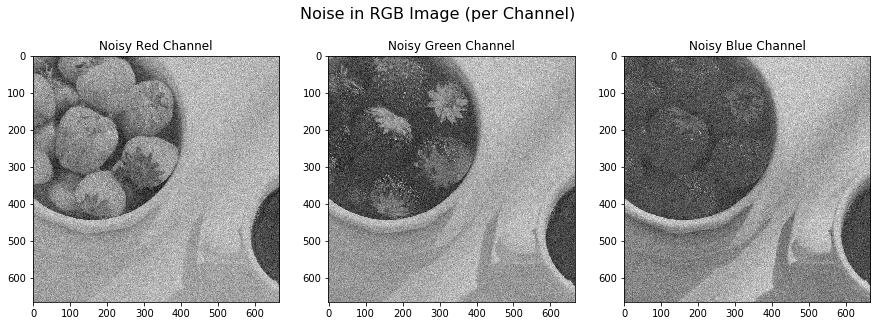

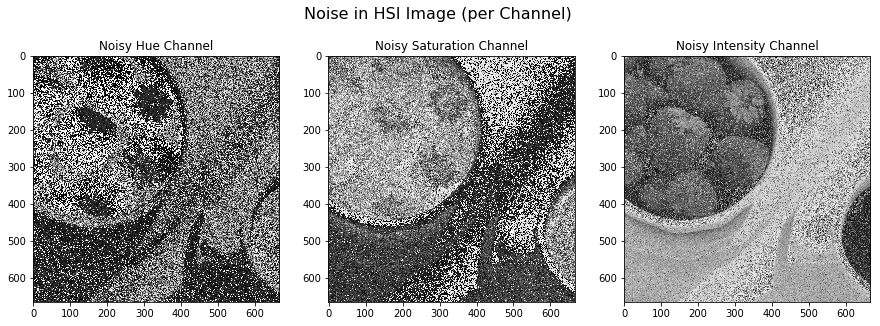

In [7]:
# Converting noisy RGB images HSI
gaussian = np.random.normal(0, 28, (rgbimg.shape[0],rgbimg.shape[1],3))
noisy_rgb = rgbimg + gaussian
r, g, b = cv2.split(noisy_rgb)
# Need to cast the noisy RGB back to uint8, otherwise we can't do rgb2hsi conversion
noisy_h, noisy_s, noisy_i = rgb2hsi(noisy_rgb.astype(np.uint8))

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(r,cmap='gray')
plt.title("Noisy Red Channel")
plt.subplot(1, 3, 2)
plt.imshow(g,cmap='gray')
plt.title("Noisy Green Channel")
plt.subplot(1, 3, 3)
plt.imshow(b,cmap='gray')
plt.title("Noisy Blue Channel")
plt.suptitle("Noise in RGB Image (per Channel)", fontsize=16)

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(noisy_h,cmap='gray')
plt.title("Noisy Hue Channel")
plt.subplot(1, 3, 2)
plt.imshow(noisy_s,cmap='gray')
plt.title("Noisy Saturation Channel")
plt.subplot(1, 3, 3)
plt.imshow(noisy_i,cmap='gray')
plt.title("Noisy Intensity Channel")
plt.suptitle("Noise in HSI Image (per Channel)", fontsize=16)